In [3]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import matplotlib.pyplot as plt

In [4]:
def image_to_feature_vector(image, size=(32, 32)):
    return cv2.resize(image, size).flatten()

In [5]:
def extract_color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])
    # handle normalizing the histogram if we are using OpenCV 2.4.X
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    # otherwise, perform "in place" normalization in OpenCV 3 (I
    # personally hate the way this is done
    else:
        cv2.normalize(hist, hist)
    # return the flattened histogram as the feature vector
    return hist.flatten()

In [6]:
print("[INFO] describing images...")
imagePaths = list(paths.list_images('Alzheimer_s Dataset/train'))
rawImages = []
features = []
labels = []
                  

[INFO] describing images...


In [7]:

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath)
    lbl = imagePath.split(os.path.sep)[-1].split(".")[0]
    label = lbl.split("(")[0]
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    rawImages.append(pixels)
    features.append(hist)
    labels.append(label)

    if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))
        

[INFO] processed 1000/5121
[INFO] processed 2000/5121
[INFO] processed 3000/5121
[INFO] processed 4000/5121
[INFO] processed 5000/5121


In [8]:
rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

[INFO] pixels matrix: 15.36MB
[INFO] features matrix: 10.24MB


In [9]:
(x_train,x_test, y_train, y_test) = train_test_split(features, labels, test_size=0.20)

In [10]:
'''knnmodel = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knnmodel.fit(trainRI, trainRL)
acc = knnmodel.score(testRI, testRL)
print("[INFO]  accuracy: {:.2f}%".format(acc * 100))'''

'knnmodel = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)\nknnmodel.fit(trainRI, trainRL)\nacc = knnmodel.score(testRI, testRL)\nprint("[INFO]  accuracy: {:.2f}%".format(acc * 100))'

In [12]:

knnmodel = KNeighborsClassifier(n_neighbors=1,n_jobs=-1)
knnmodel.fit(x_train,y_train)

#print("trainFeat",trainFeat)
#print("trainLabels",trainLabels)
acc = knnmodel.score(x_test,y_test)
print("[INFO]  accuracy: {:.2f}%".format(acc * 100))

[INFO]  accuracy: 75.61%


['NonDemented ']


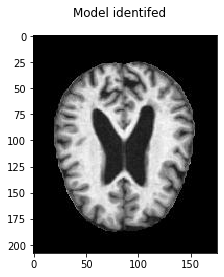

In [13]:
import cv2
feat = []
img = cv2.imread("Alzheimer_s Dataset/test/NonDemented/28.jpg")
#pixels = image_to_feature_vector(img)
hist = extract_color_histogram(img)
feat.append(hist)
feat=np.array(feat)

print(knnmodel.predict(feat))
fig = plt.figure()
fig.suptitle('Model identifed')
plt.imshow(img, cmap='gray') 

In [13]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
bmodel = BaggingClassifier(base_estimator=SVC(),bootstrap_features=True,n_jobs=-1).fit(x_train,y_train)
acc = bmodel.score(x_test,y_test)
print(acc)

0.551219512195122


['NonDemented ']


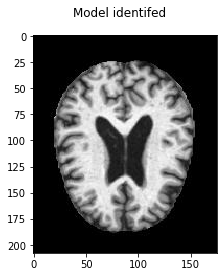

In [14]:
import cv2
feat = []
img = cv2.imread("Alzheimer_s Dataset/test/VeryMild/26.jpg")
pixels = image_to_feature_vector(img)
hist = extract_color_histogram(img)
feat.append(hist)
feat=np.array(feat)

print(bmodel.predict(feat))
fig = plt.figure()
fig.suptitle('Model identifed')
plt.imshow(img, cmap='gray')

In [14]:
from Fuzzy_knn import FuzzyKNN
import joblib

In [15]:
custModel = FuzzyKNN()

#custModel.fit(x_train,y_train)

model = joblib.load('filename.pkl') 

In [ ]:
acc=model.score(x_test,y_test)

C:\Users\91901\Fuzzy_knn.py:56: RuntimeWarning: divide by zero encountered in double_scalars
  den += 1 / (dist ** (2 / (m-1)))
C:\Users\91901\Fuzzy_knn.py:61: RuntimeWarning: invalid value encountered in double_scalars
  num = (neighbors.iloc[n].membership[c]) / (dist ** (2 / (m-1)))
C:\Users\91901\Fuzzy_knn.py:61: RuntimeWarning: divide by zero encountered in double_scalars
  num = (neighbors.iloc[n].membership[c]) / (dist ** (2 / (m-1)))
C:\Users\91901\Fuzzy_knn.py:63: RuntimeWarning: invalid value encountered in double_scalars
  vote = num/den


In [31]:
import cv2
feat = []
img = cv2.imread("Alzheimer_s Dataset/test/NonDemented/28.jpg")
#pixels = image_to_feature_vector(img)
hist = extract_color_histogram(img)
feat.append(hist)
feat=np.array(feat)

print(model.predict(feat))
#fig = plt.figure()
#fig.suptitle('Model identifed')
#plt.imshow(img, cmap='gray') 